In [82]:
# Importing libraries for data loading and visualization..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import flatten

import warnings
warnings.filterwarnings('ignore').

In [83]:
# Loading the dataset..
df=pd.read_csv("Data file.csv",parse_dates=['pdate'],index_col=None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [84]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',df.label.value_counts())



Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_

In [85]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [86]:
# Checking Statistical Informations...
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [87]:
# Dropping those features which are not adding any important information...
df.drop(['Unnamed: 0','pcircle','msisdn'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


# EDA (Exploratory data Analysis)

In [88]:
# Checking for negative values in the Dataset, as we can see that many of the features are having negative values...
(df.drop(['pdate'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

**Some of the features like "rental30" and "rental90" can have negative values as these feature will show the loan amount per user.**

In [89]:
# Dropping few features...
df.drop(['rental30','rental90','pdate'],axis=1,inplace=True)

In [90]:
# This loop will drop all the negative values from those features in which they are not needed...
index=[]
for cols in df.columns.values:
    Index_1=df[df[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

In [91]:
# Dropping the negative values in the features where these negative values don't make any sense...
df.drop(index_fl,inplace=True)

In [92]:
# Checking some rows where negative values were present, as we can see there are no negative values..
df[20:30]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
20,1,100.0,769.614000,777.460000,6.0,0.0,770,5,20.0,8867.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
21,0,378.0,514.693333,515.200000,2.0,0.0,773,1,0.0,773.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000,0.000000
22,1,463.0,1540.000000,1541.000000,4.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,2.0,12,6,0.0,0.000,42.000000
23,1,857.0,58.023333,58.023333,2.0,0.0,1539,4,12.0,6164.0,...,4,24,6.0,0.0,4.0,24,6,0.0,6.000,6.000000
24,0,966.0,291.563333,291.563333,0.0,0.0,0,0,0.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
25,1,656.0,63.250000,63.250000,1.0,0.0,770,15,1.0,12674.0,...,5,30,6.0,0.0,5.0,30,6,0.0,1.800,1.800000
26,1,1179.0,3703.272000,3712.840000,2.0,0.0,770,6,5.0,5395.0,...,4,24,6.0,0.0,5.0,30,6,0.0,6.000,6.000000
27,0,871.0,505.600000,508.000000,16.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
28,1,1610.0,6688.559333,6705.260000,1.0,0.0,4048,9,1.0,32149.0,...,8,48,6.0,0.0,8.0,48,6,0.0,1.375,1.666667
29,1,67.0,16.166667,16.166667,3.0,0.0,1539,2,12.0,3086.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000


In [93]:
# reading dataset...
df_new=pd.read_csv("Data file.csv",parse_dates=['pdate'],index_col=None)

In [94]:
# Now placing the dropped "rental30" and "rental90" values in which the negative values are not outliers...
df['rental30']=df_new['rental30']
df['rental90']=df_new['rental90']
df['pdate']=df_new['pdate']

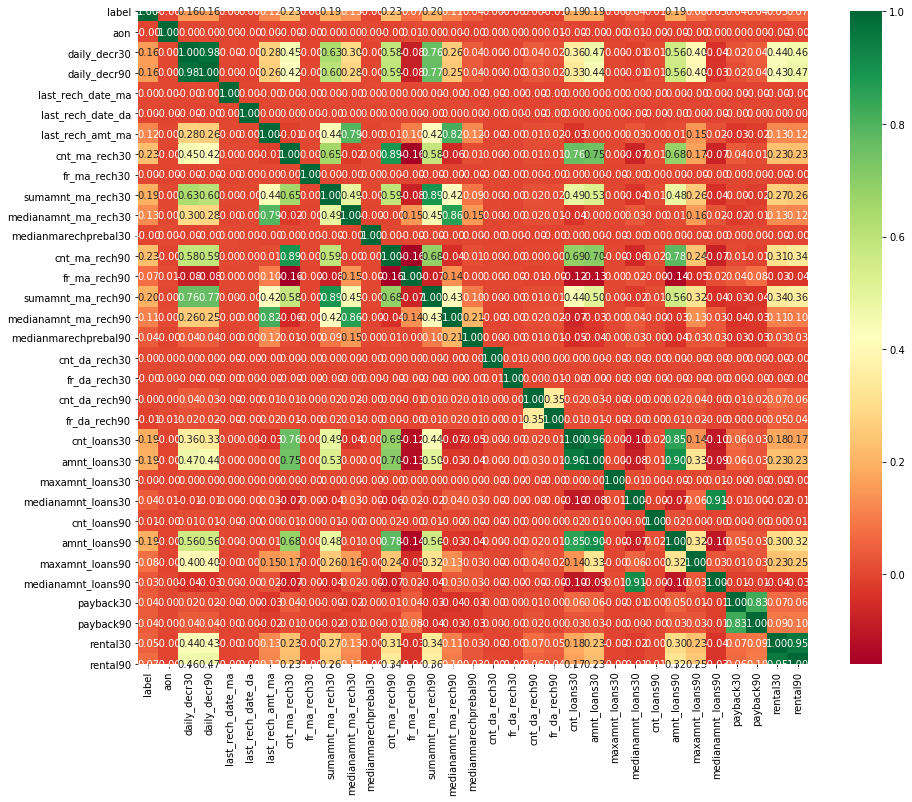

In [95]:
# Checking the correlation between the features and the label...
corr = df.corr()
plt.figure(figsize=(15,12))     #(column,row)
sns.heatmap(corr,cmap='RdYlGn',annot=True,fmt='0.2f')
plt.show()

# Univariant Plot Analysis

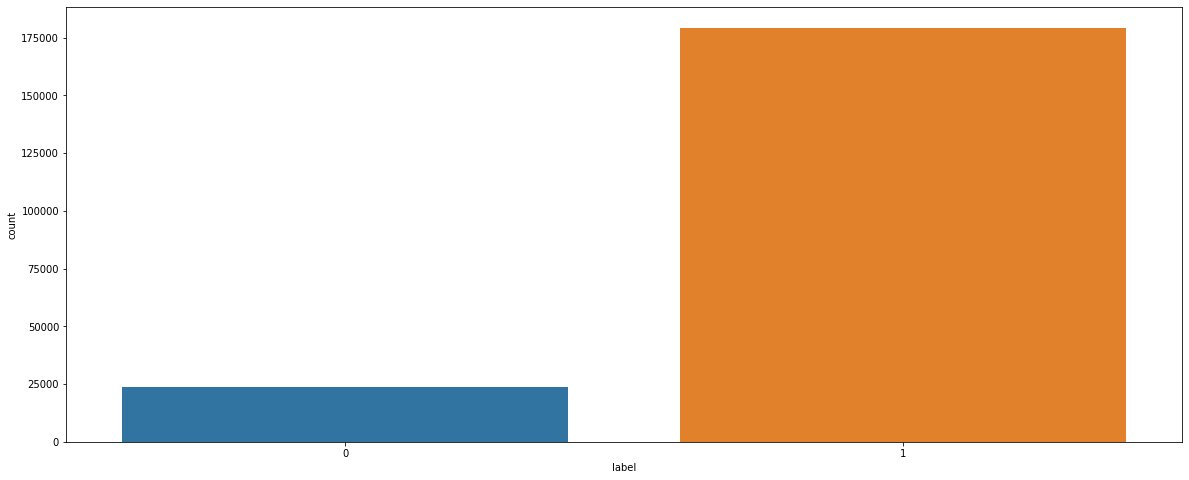

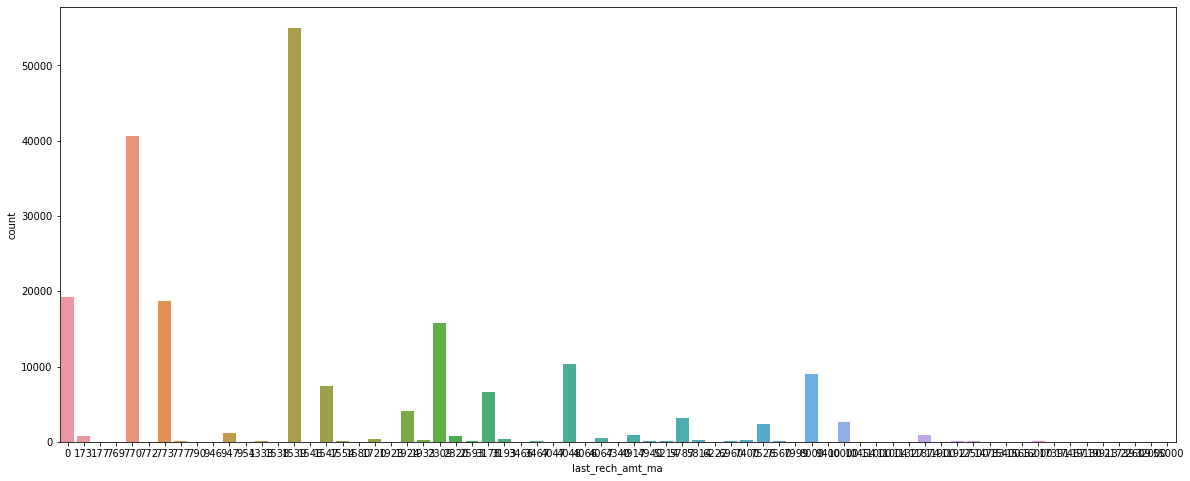

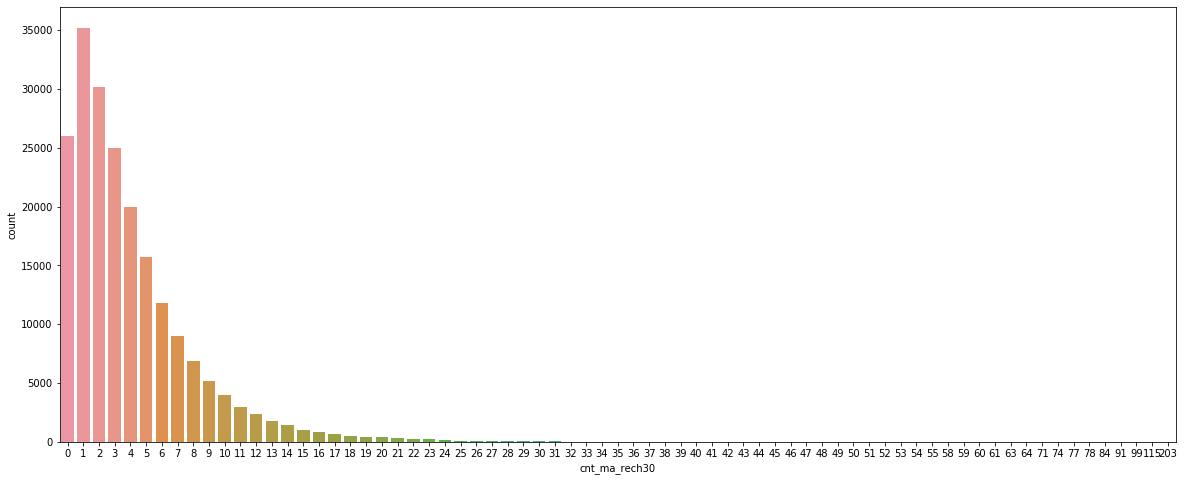

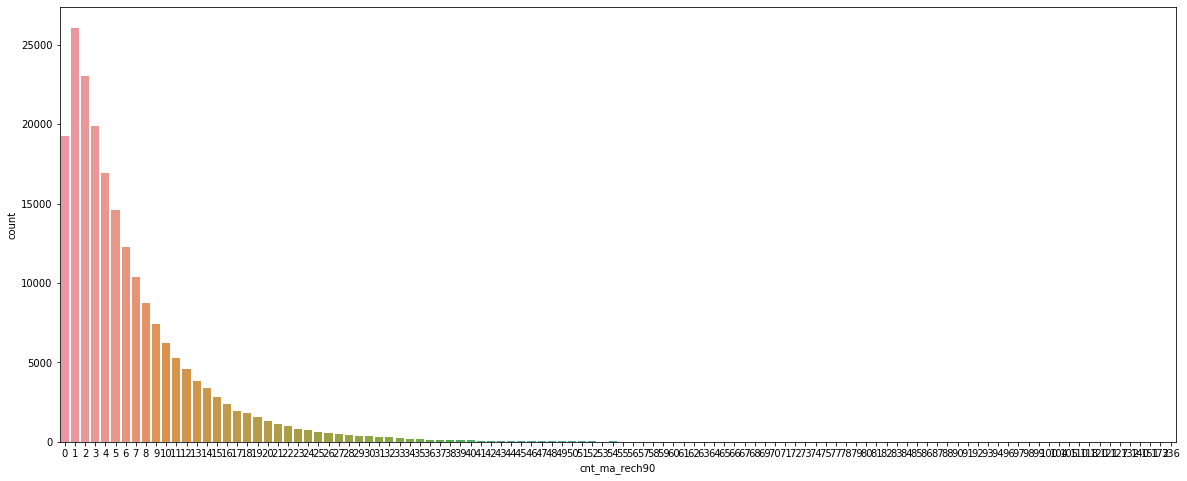

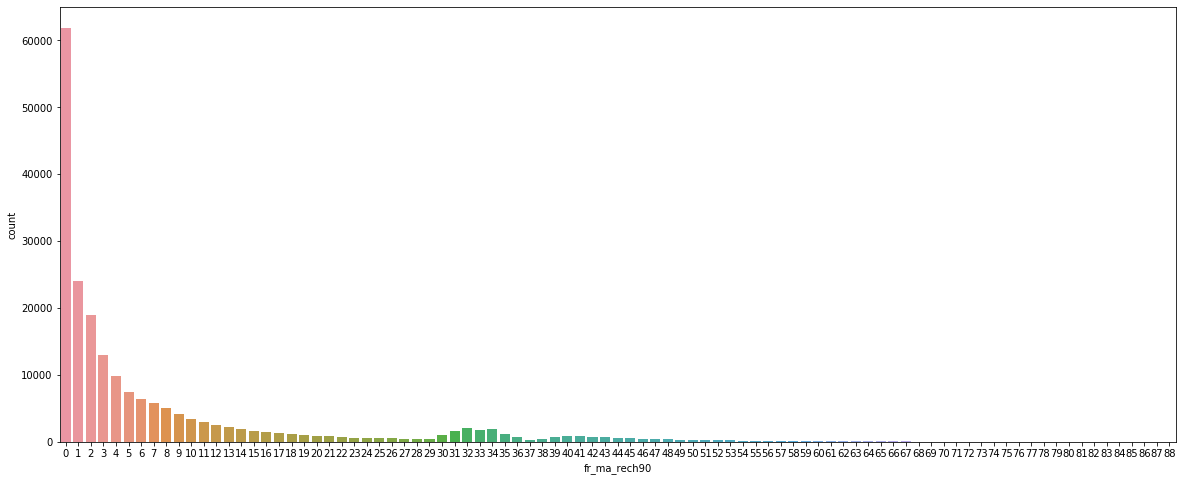

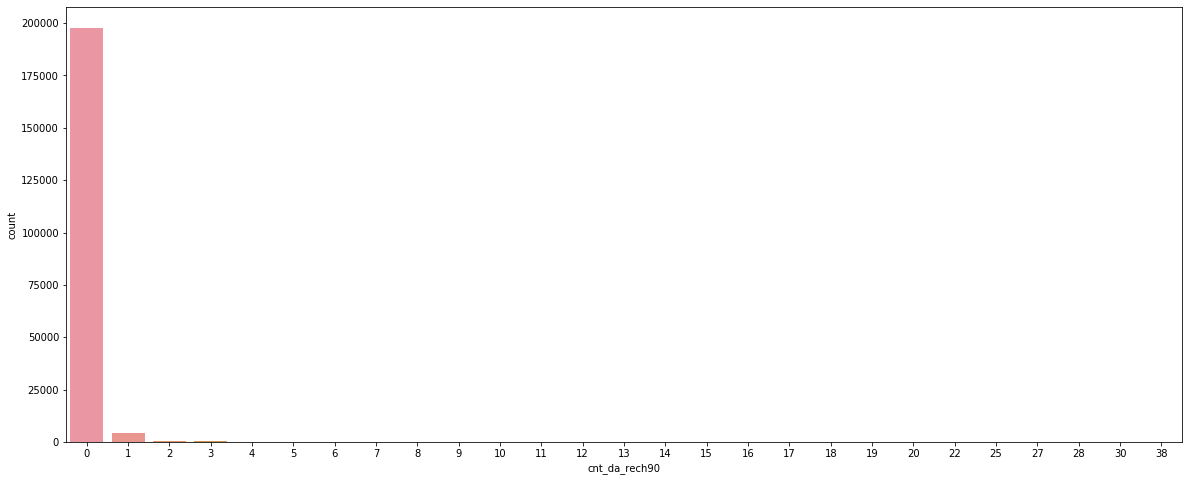

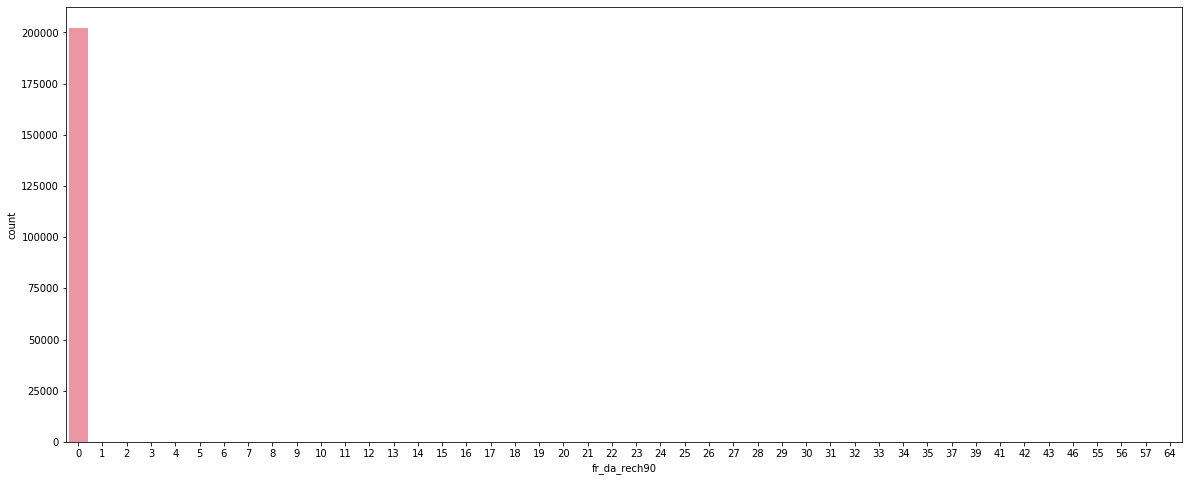

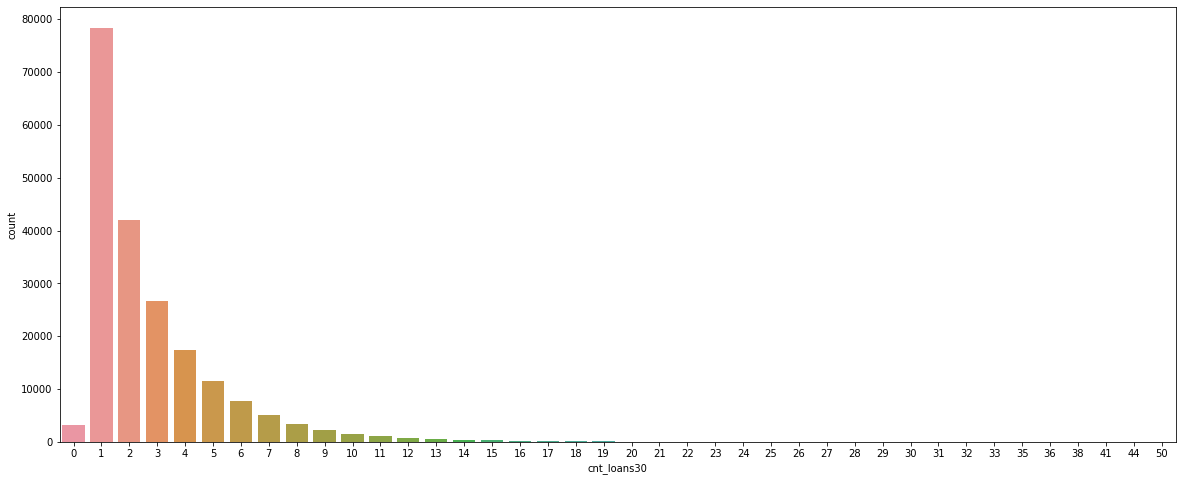

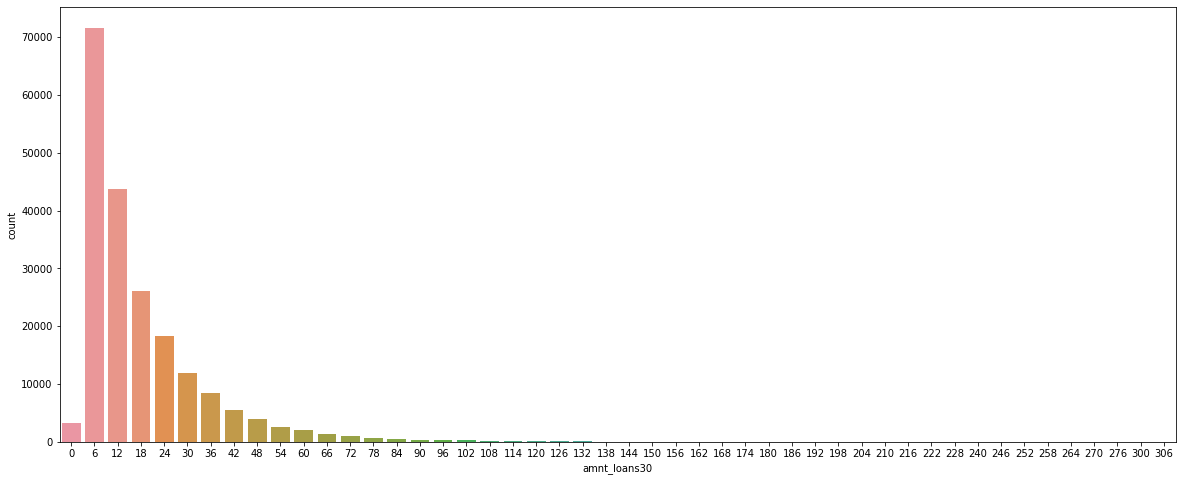

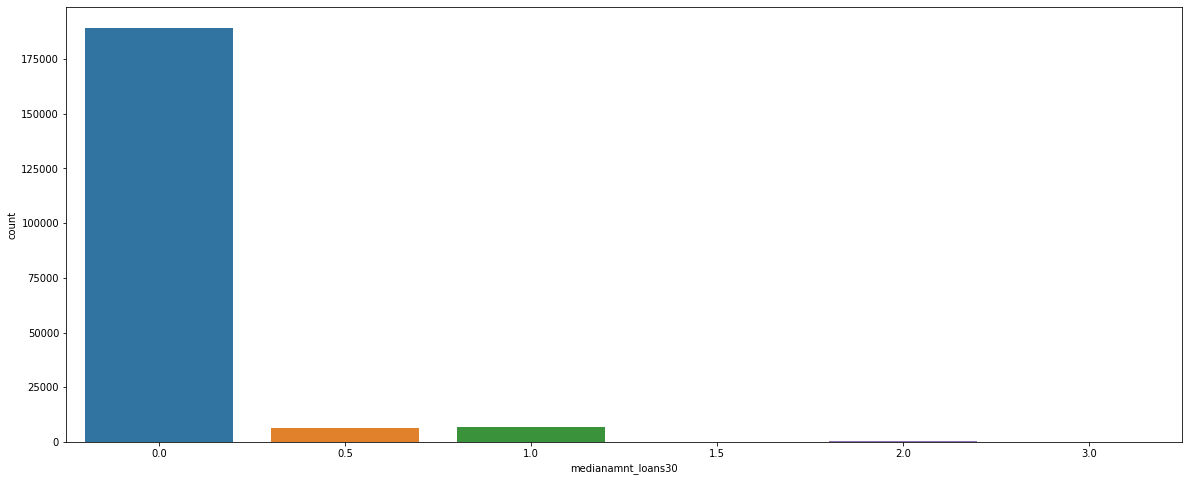

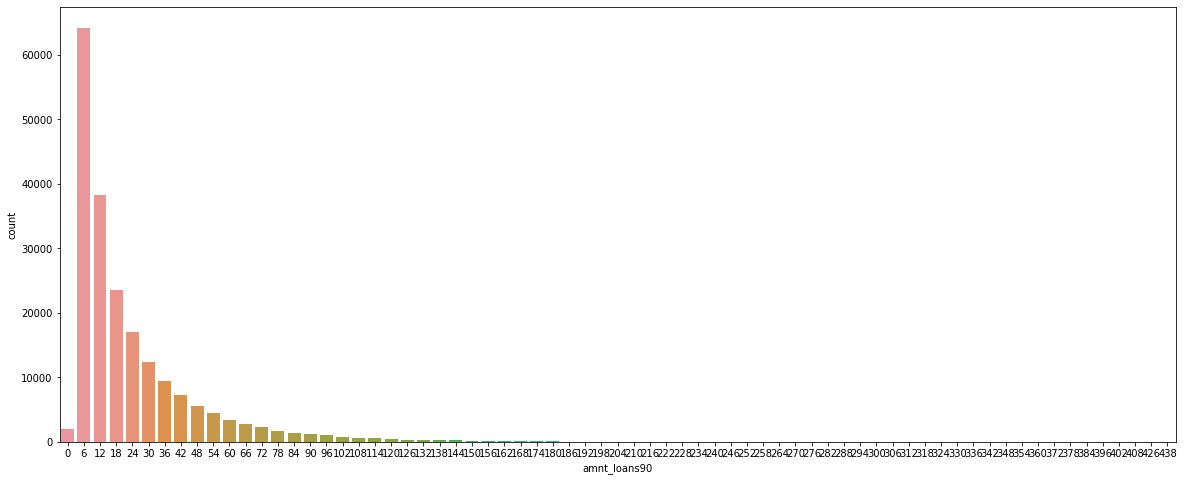

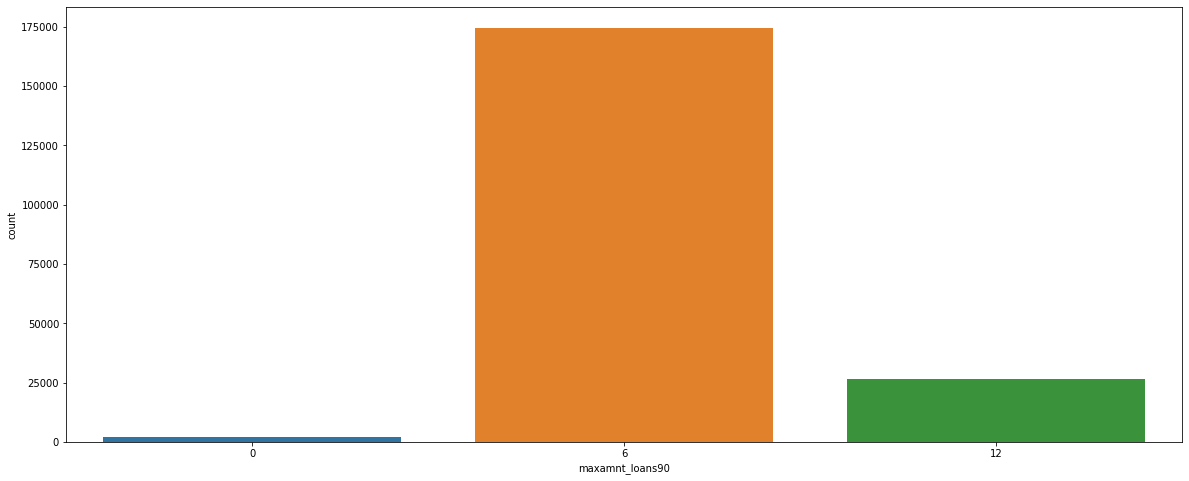

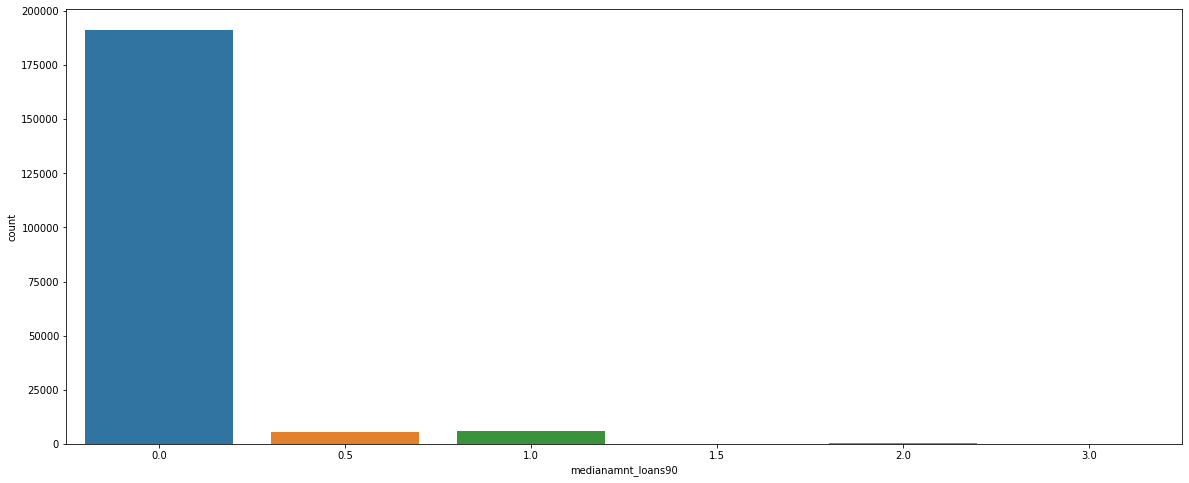

In [96]:
# For loop to display some important features counts in one go...
list=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.show()

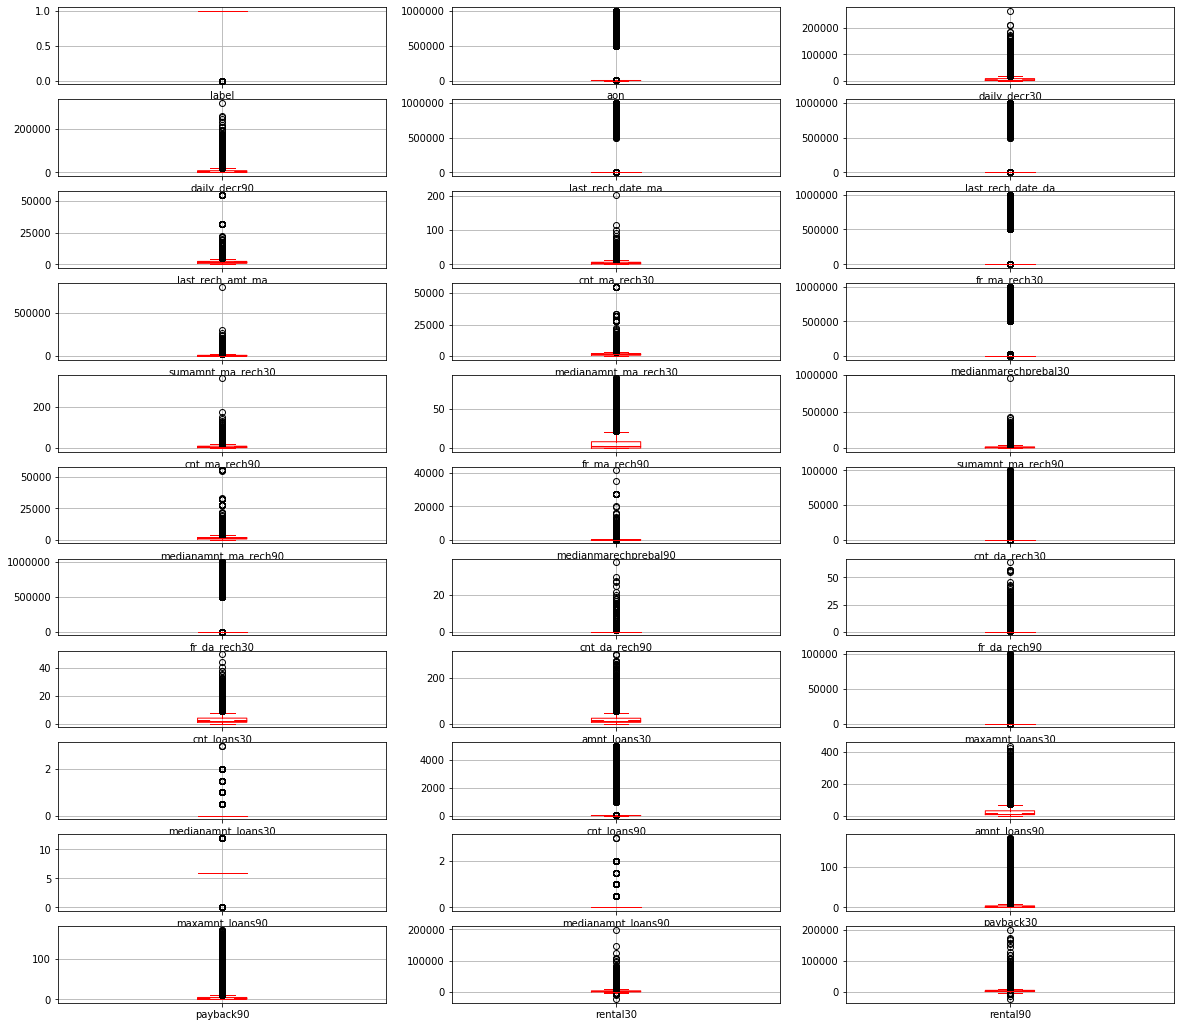

In [97]:
# Plotting the boxplot in order to check few statistical values and outliers
df.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)
plt.show()

**As we can see that except the negative values there are still lot of outliers present.**

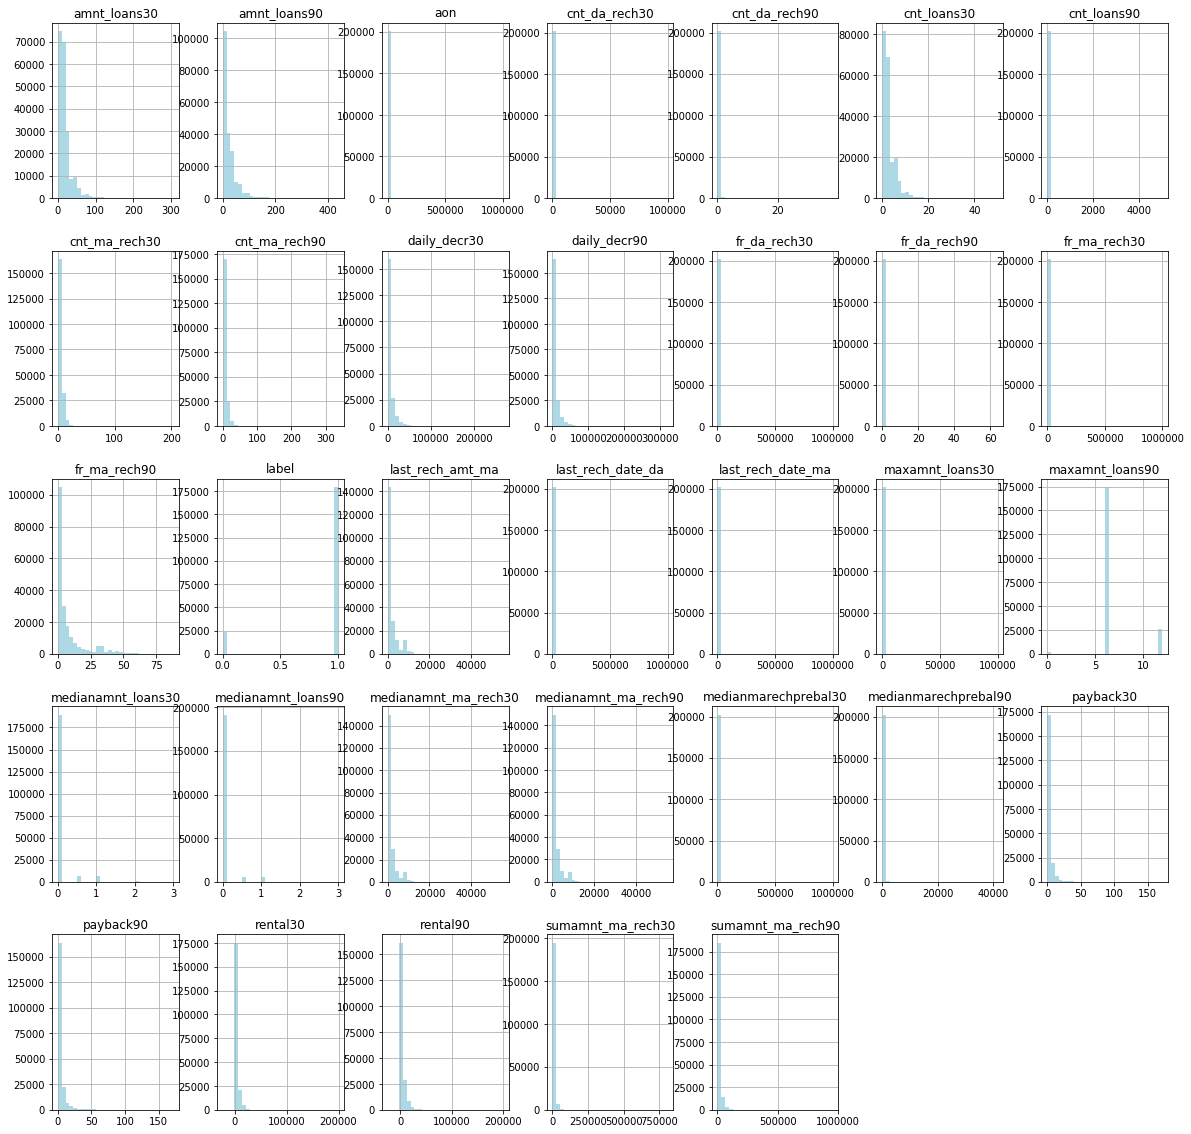

In [98]:
# Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue') 
plt.show()

**From the above histogram plots, it is clear that the data is rightly skewed...

In [99]:
# Dropping the date feature to proceed further for outliers removing part...
df.drop('pdate',axis=1,inplace=True)

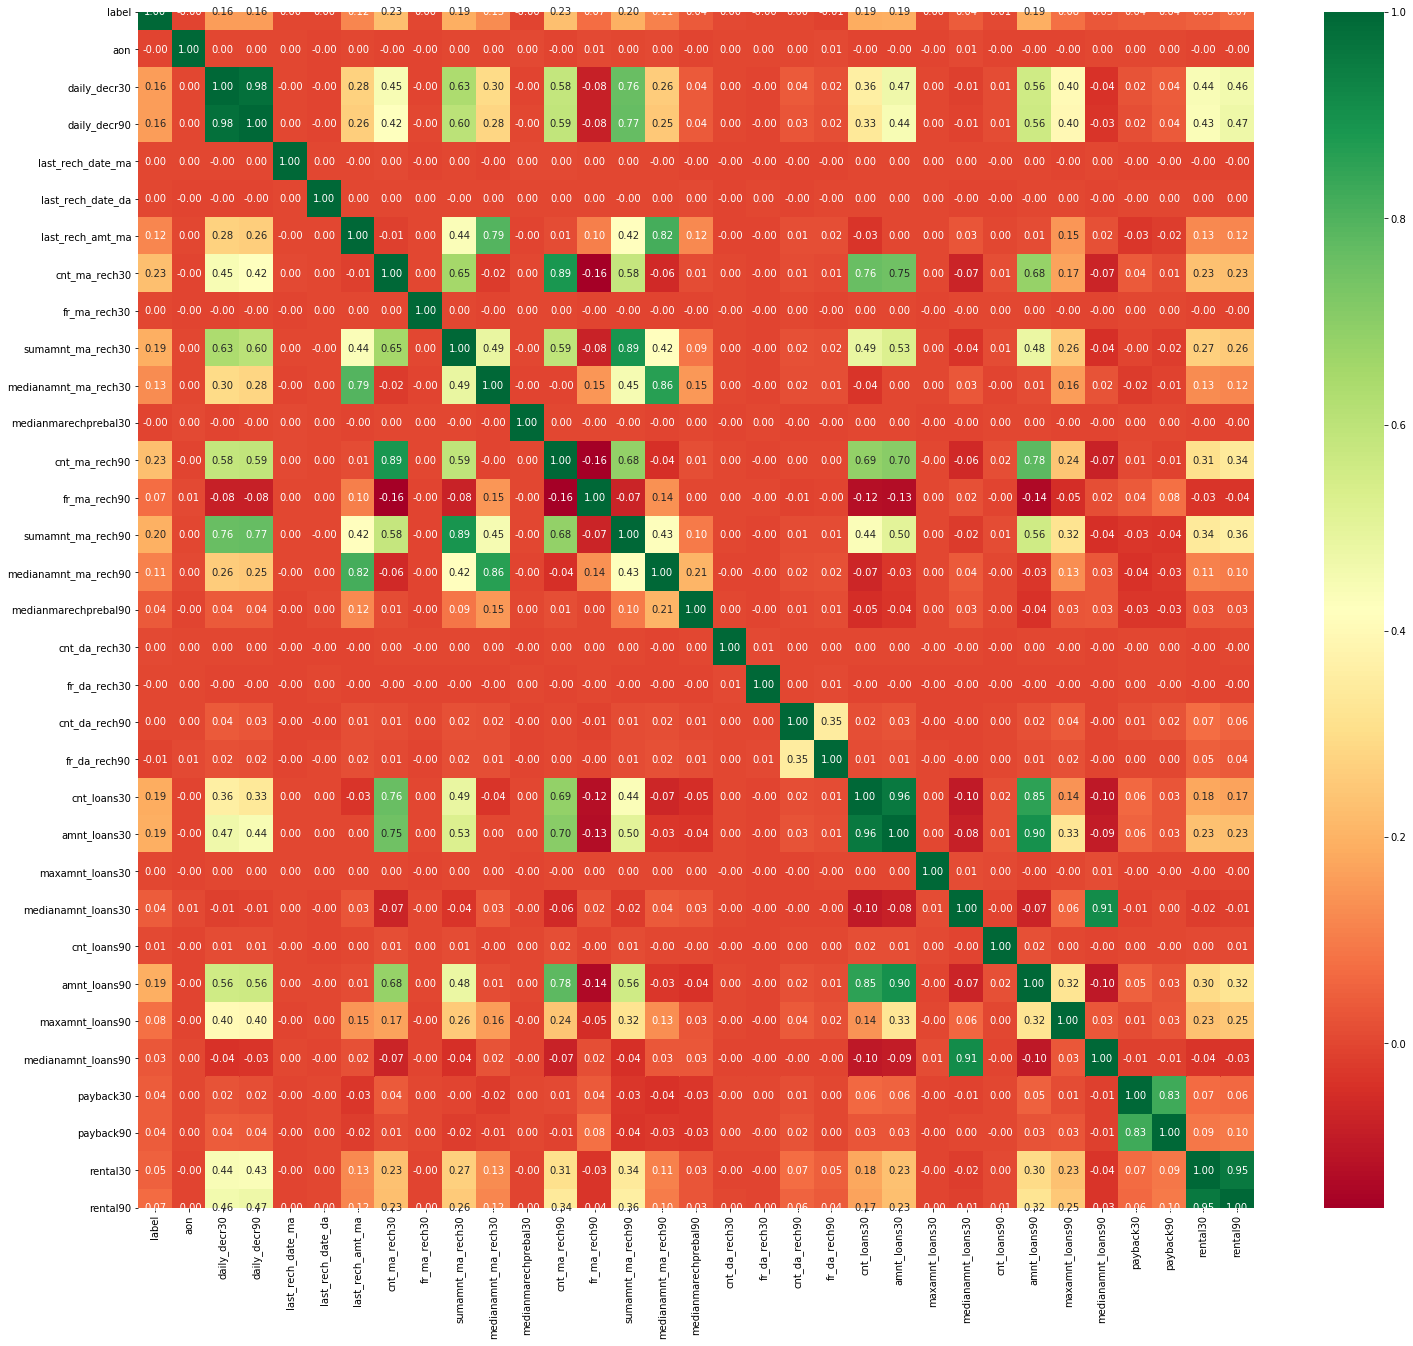

In [101]:
# Checking correlation among the features...
corr = df.corr()
plt.figure(figsize=(25,22))     #(column,row)
sns.heatmap(corr,cmap='RdYlGn',annot=True,fmt='0.2f')
plt.show()

In [26]:
# Now dropping the features having same correlation...
df.drop(["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1,inplace=True)

In [27]:
# Checking the dataframe after dropping...
df.tail()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
209588,1,404.0,151.872333,1.0,0.0,4048,3178.0,91.81,3,2,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1089.19
209589,1,1075.0,36.936000,4.0,0.0,773,773.0,161.30,6,2,...,0,0,3,6.0,3.0,18,6,0.0,1.000000,1728.36
209590,1,1013.0,11904.350000,3.0,0.0,1539,1539.0,51.13,11,5,...,0,0,4,12.0,6.0,54,12,0.0,3.833333,8893.20
209591,1,1732.0,12574.370000,2.0,38.0,773,773.0,164.00,6,4,...,1,0,2,12.0,3.0,24,12,0.0,10.500000,984.58
209592,1,1581.0,4534.820000,13.0,0.0,7526,4532.5,356.70,3,19,...,0,0,2,12.0,2.0,18,12,0.0,0.000000,631.20


In [28]:
# Removing outliers from features...
df_clean = df[df['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]

In [29]:
# Checking the clean dataset...
df_clean.head()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,272.0,3065.150000,2.0,0.0,1539,1539.0,7.50,2,21,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,260.13
1,1,712.0,12124.750000,20.0,0.0,5787,5787.0,61.04,1,0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,3691.26
2,1,535.0,1398.000000,3.0,0.0,1539,1539.0,66.32,1,0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,900.13
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.00,1,0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,159.42
4,1,947.0,150.619333,4.0,0.0,2309,2309.0,29.00,8,2,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,1098.90


In [30]:
# Checking the skewness...
df_clean.skew()

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

**A lot of skewness is present in the data, thus removing it.**

In [31]:
# Removing Skewness.........
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])

In [32]:
# Checking skewness again...
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.090668
medianamnt_ma_rech90    -2.304321
medianmarechprebal90    -0.571072
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

##### Visualization after outliers removal

In [33]:
# Checking the unique values in the features...
df_clean.nunique()

label                        2
aon                       2368
daily_decr90            151238
last_rech_date_ma          110
last_rech_date_da          116
last_rech_amt_ma            69
medianamnt_ma_rech30       496
medianmarechprebal30     28613
cnt_ma_rech90              109
fr_ma_rech90                89
sumamnt_ma_rech90        31126
medianamnt_ma_rech90       592
medianmarechprebal90     27997
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 39
maxamnt_loans30              3
cnt_loans90                 63
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback90                 2350
rental90                135015
dtype: int64

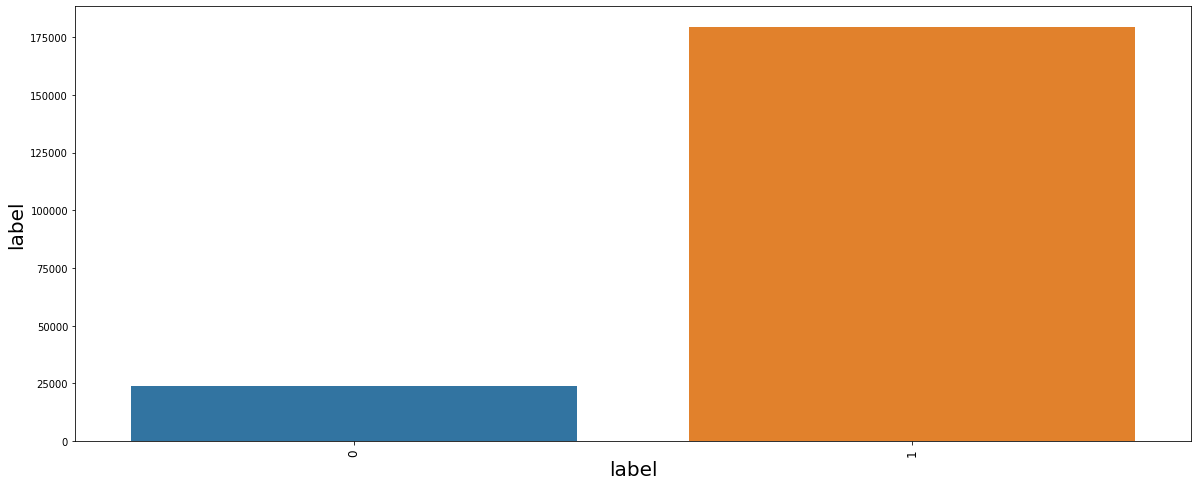

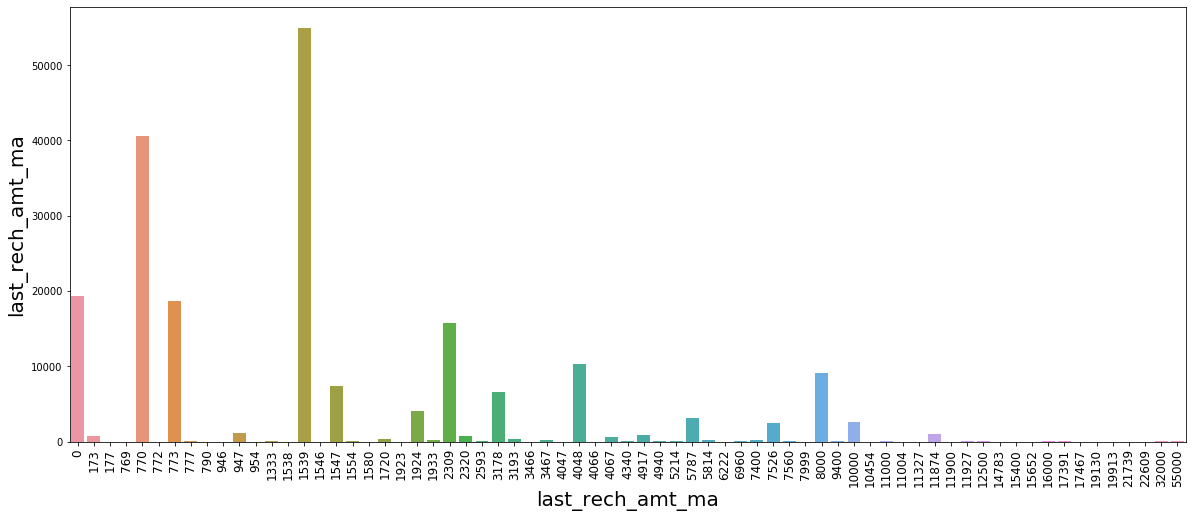

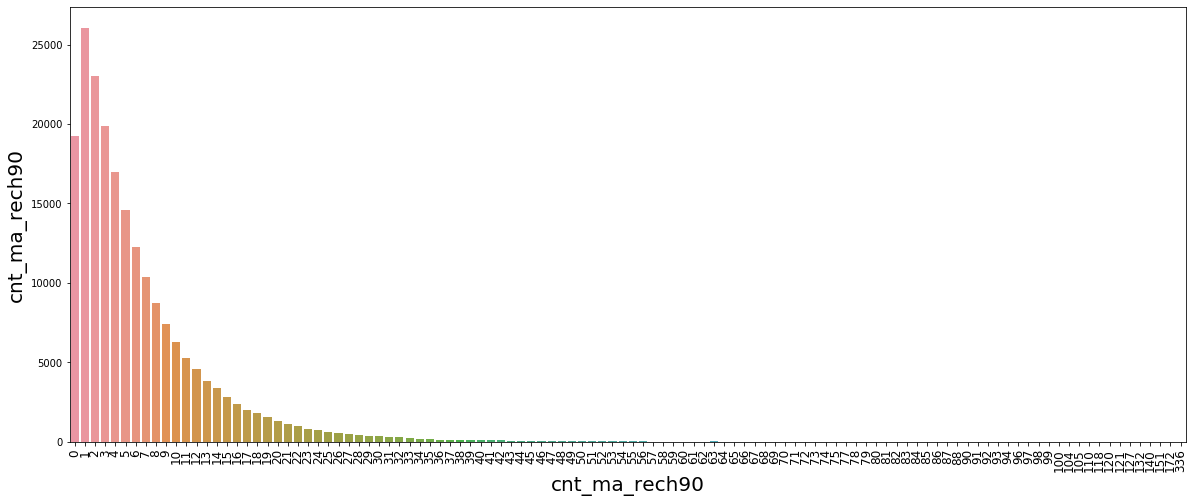

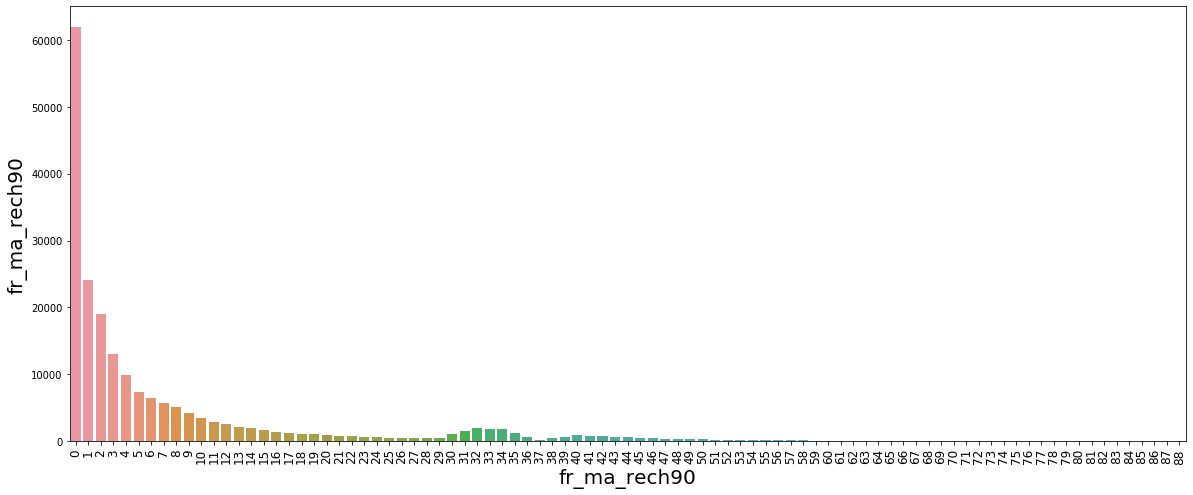

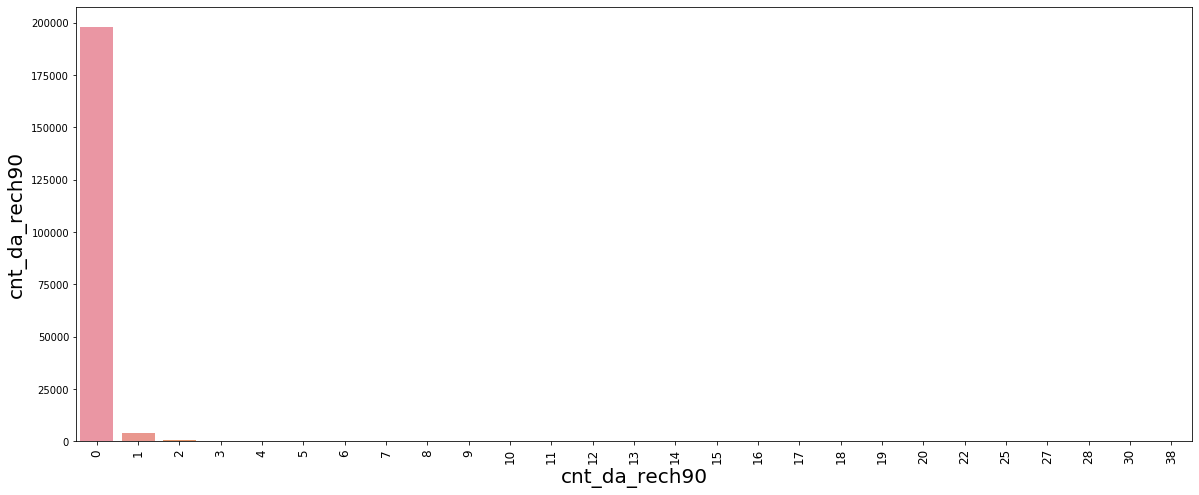

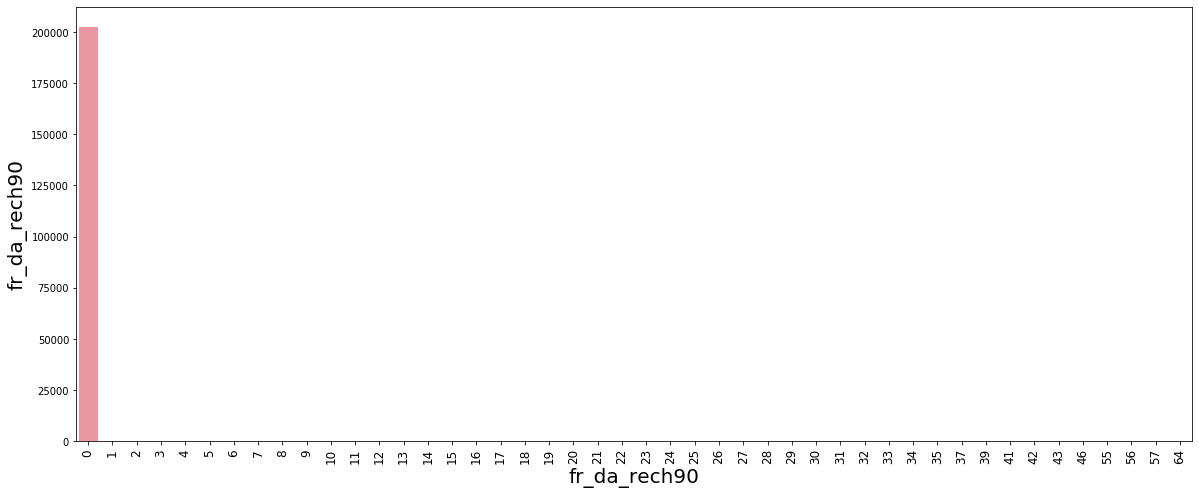

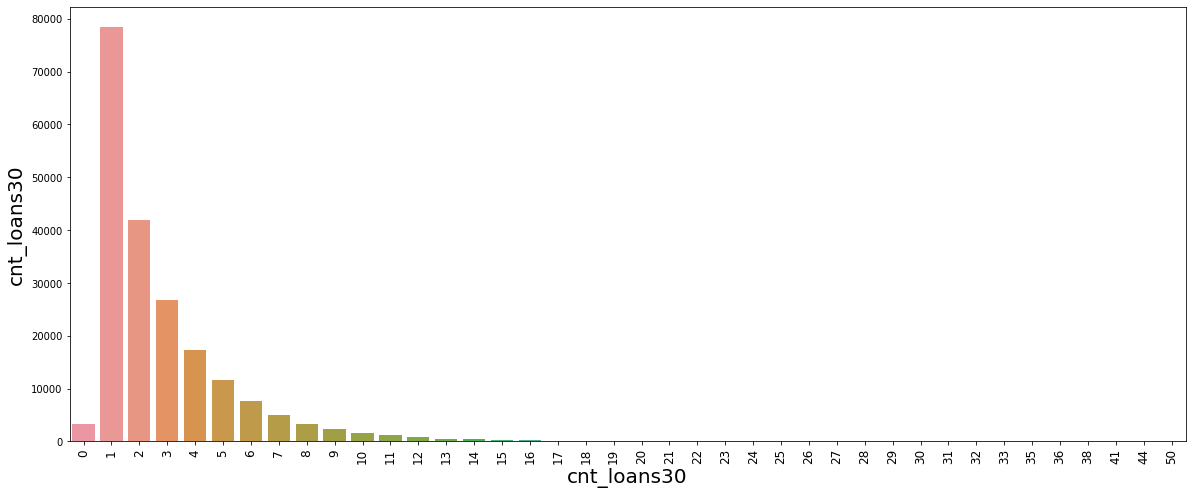

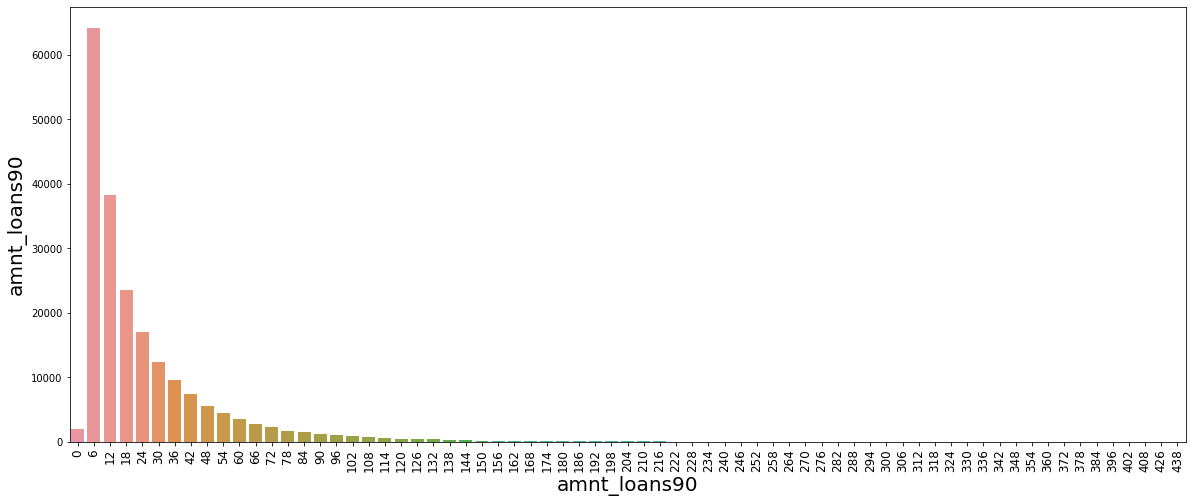

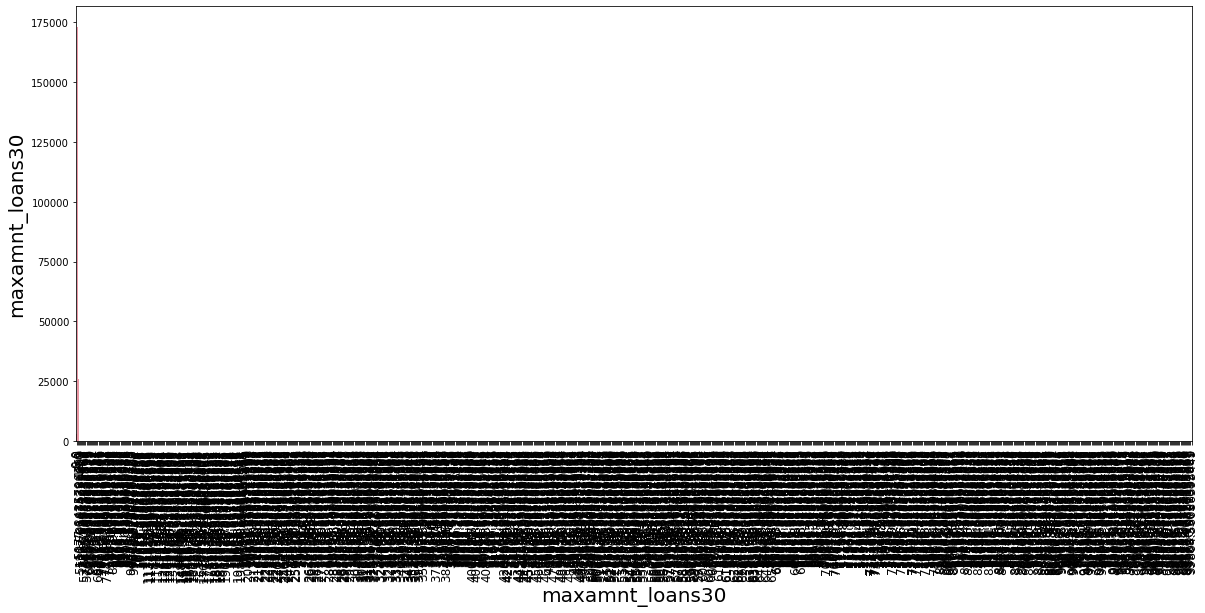

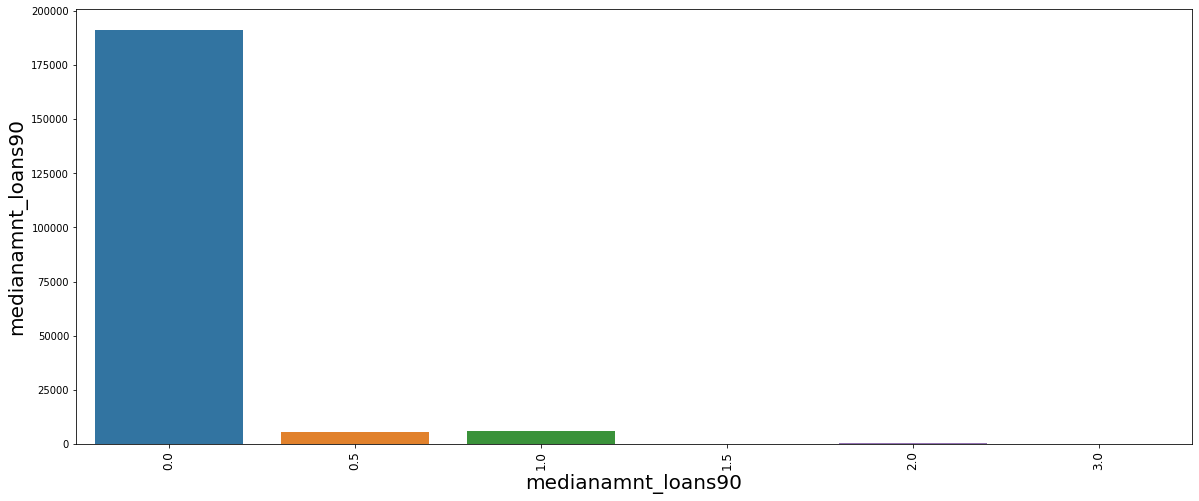

In [34]:
# For loop to display some important features counts in one go after outlier removal...
list=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90','cnt_da_rech90', 'fr_da_rech90',
      'cnt_loans30', 'amnt_loans90','maxamnt_loans30', 'medianamnt_loans90', ]


for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel(f'{i}',fontsize=20)
    plt.show()

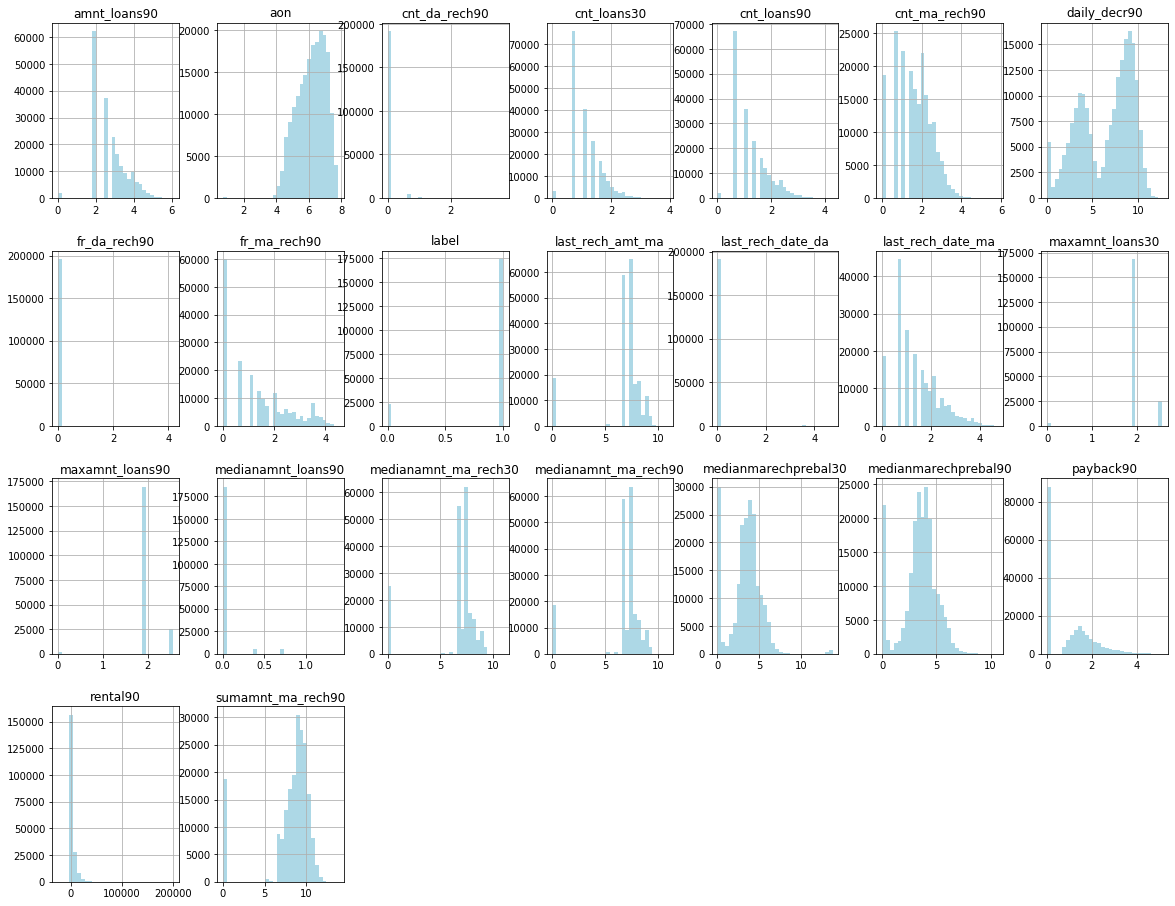

In [35]:
# Checking the Distribution using the histogram plot.
df_clean.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue') 
plt.show()

**From the above plots it is clear that the data is now normally distributed after outlier treatment and skewness removal.**

In [36]:
# Checking feature information...
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197074 entries, 0 to 209592
Data columns (total 23 columns):
label                   197074 non-null int64
aon                     197074 non-null float64
daily_decr90            197074 non-null float64
last_rech_date_ma       197074 non-null float64
last_rech_date_da       197074 non-null float64
last_rech_amt_ma        197074 non-null float64
medianamnt_ma_rech30    197074 non-null float64
medianmarechprebal30    197074 non-null float64
cnt_ma_rech90           197074 non-null float64
fr_ma_rech90            197074 non-null float64
sumamnt_ma_rech90       197074 non-null float64
medianamnt_ma_rech90    197074 non-null float64
medianmarechprebal90    197074 non-null float64
cnt_da_rech90           197074 non-null float64
fr_da_rech90            197074 non-null float64
cnt_loans30             197074 non-null float64
maxamnt_loans30         197074 non-null float64
cnt_loans90             197074 non-null float64
amnt_loans90            197

In [37]:
# checking statistical feature information...
df_clean.describe()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
count,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,...,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000
mean,0.883145,6.165001,6.501437,1.483485,0.091081,6.708977,6.417064,3.359792,1.629827,1.366985,...,0.022564,0.009193,1.174300,1.994621,1.321503,2.830003,2.007318,0.033006,1.001298,3542.600243
std,0.321248,0.870110,2.924345,0.931668,0.556091,2.288109,2.542768,1.929863,0.885039,1.230499,...,0.150553,0.150559,0.535192,0.326880,0.645018,0.865199,0.289144,0.138901,1.054174,5808.679857
min,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24720.580000
25%,1.000000,5.517453,3.891412,0.693147,0.000000,6.647688,6.647688,2.564949,1.098612,0.000000,...,0.000000,0.000000,0.693147,1.945910,0.693147,1.945910,1.945910,0.000000,0.000000,320.137500
50%,1.000000,6.261492,7.406711,1.386294,0.000000,7.339538,7.339538,3.589059,1.609438,1.098612,...,0.000000,0.000000,1.098612,1.945910,1.098612,2.564949,1.945910,0.000000,1.029619,1379.400000
75%,1.000000,6.872128,8.993642,2.079442,0.000000,7.745003,7.562681,4.448516,2.302585,2.197225,...,0.000000,0.000000,1.609438,1.945910,1.791759,3.433987,1.945910,0.000000,1.717651,4288.900000
max,1.000000,7.800163,12.678046,4.736198,4.753590,10.915107,10.915107,13.814991,5.820083,4.488636,...,3.663562,4.174387,3.931826,2.564949,4.276666,6.084499,2.564949,1.386294,5.150397,200148.110000


In [38]:
# printing cleaned data...
df_clean.head()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,5.609472,8.028178,1.098612,0.0,7.339538,7.339538,2.140066,1.098612,3.091042,...,0.0,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,3.401197,260.13
1,1,6.569481,9.403087,3.044522,0.0,8.663542,8.663542,4.127779,0.693147,0.000000,...,0.0,0.0,0.693147,2.564949,0.693147,2.564949,2.564949,0.0,0.000000,3691.26
2,1,6.284134,7.243513,1.386294,0.0,7.339538,7.339538,4.209457,0.693147,0.000000,...,0.0,0.0,0.693147,1.945910,0.693147,1.945910,1.945910,0.0,0.000000,900.13
3,1,5.488938,3.101353,3.737670,0.0,6.854355,0.000000,0.000000,0.693147,0.000000,...,0.0,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,0.000000,159.42
4,1,6.854355,5.021373,1.609438,0.0,7.745003,7.745003,3.401197,2.197225,1.098612,...,0.0,0.0,2.079442,1.945910,2.079442,3.761200,1.945910,0.0,1.203973,1098.90


# Bivariant Analysis

In [39]:
# Making a copy of cleaned data for the visualization purpose...
df_visual=df_clean.copy()

In [40]:
# Dropping the features which will not be used for visualization purplose...
df_visual.reset_index(inplace = True)
df_visual.drop(['daily_decr90', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'medianamnt_ma_rech30',
                'medianmarechprebal30', 'fr_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90',
                'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30','maxamnt_loans90', 'medianamnt_loans90',]
               ,axis=1,inplace=True)
               

In [41]:
# printing the features used for visualization...
df_visual.head()

,index,label,aon,cnt_ma_rech90,sumamnt_ma_rech90,cnt_loans90,amnt_loans90,payback90,rental90
0,0,0,5.609472,1.098612,8.032360,1.098612,2.564949,3.401197,260.13
1,1,1,6.569481,0.693147,8.663542,0.693147,2.564949,0.000000,3691.26
2,2,1,6.284134,0.693147,7.339538,0.693147,1.945910,0.000000,900.13
3,3,1,5.488938,0.693147,6.854355,1.098612,2.564949,0.000000,159.42
4,4,1,6.854355,2.197225,10.064628,2.079442,3.761200,1.203973,1098.90


##### Feature "rental90": Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days

In [42]:
# Making a new  feature "Balance_Category" to store the different categories for the rental90 feature to get a better view of the visualtion..
conditions_1=[(df_visual['rental90'] <=0),df_visual['rental90'].between(0,1379),df_visual['rental90'].between(1379,4280),(df_visual['rental90'] > 4280)]
values_1= ['Negative or zero Balance', 'Low Balance', 'Average Balance','High Balance']
df_visual['Balance_Category']=np.select(conditions_1,values_1)

In [43]:
# Printing the new feature...
df_visual['Balance_Category'].value_counts()

Low Balance                 87021
High Balance                49379
Average Balance             49179
Negative or zero Balance    11495
Name: Balance_Category, dtype: int64

**According to the data it is clear that, users having Low balance are more in number and the persons with negative or zero balance are less.**

In [44]:
# Mapping "Balance_Category" feature with precentage value with respect to the label. 
balance_category_percent = pd.crosstab(df_visual['label'],df_visual['Balance_Category']).apply(lambda x: x/x.sum()*100)
balance_category_percent = balance_category_percent.transpose()

In [45]:
# printing values...
balance_category_percent

label,0,1
Balance_Category,,
Average Balance,10.014437,89.985563
High Balance,7.930497,92.069503
Low Balance,12.588915,87.411085
Negative or zero Balance,28.125272,71.874728


**Label 0: defaulter**

**Label 1: Non-defaulter**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

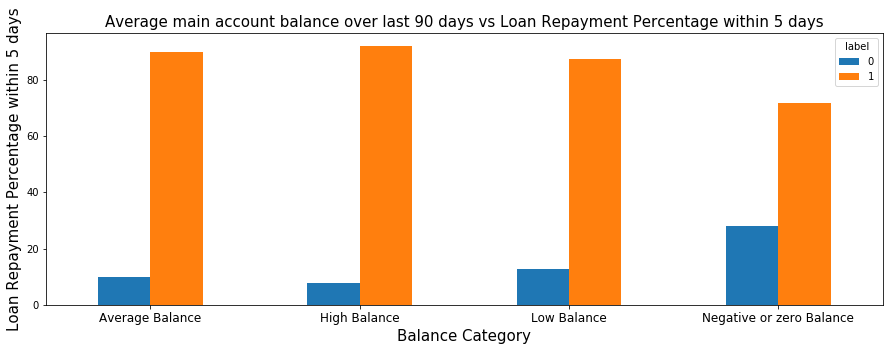

In [46]:
#   Graphical representation of the User's balance along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

balance_category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Balance Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Conclusion:                                                                         
**From the above Graph and the crosstab table it is clear that:**                        
1) 28% of Users having negative or zero balance are defaulters, which is very high.                    
2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.       
3) Users having high balance and are defaulters are very less in number.          

##### Feature "cnt_loans90": Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days

In [47]:
# Making a new  feature "Loans_Frequency" to store the different categories for the cnt_loans90 feature to get a better view of the visualtion..
conditions_2=[(df_visual['cnt_loans90'] <=0),df_visual['cnt_loans90'].between(0,2),(df_visual['cnt_loans90'] > 2)]
values_2= ['No Loans Taken', 'Average number of loans Taken','Too much loans taken']
df_visual['Loans_Frequency']=np.select(conditions_2,values_2)

In [48]:
df_visual['Loans_Frequency'].value_counts()

Average number of loans Taken    163223
Too much loans taken              31902
No Loans Taken                     1949
Name: Loans_Frequency, dtype: int64

**Users who take average amount of loans afe more in number.**

In [49]:
# Mapping Loans_Frequency with precentage value with respect to label 
Loans_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Loans_Frequency']).apply(lambda x: x/x.sum()*100)
Loans_Frequency_percent = Loans_Frequency_percent.transpose()
Loans_Frequency_percent

label,0,1
Loans_Frequency,,
Average number of loans Taken,13.882235,86.117765
No Loans Taken,0.000000,100.000000
Too much loans taken,1.159802,98.840198


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

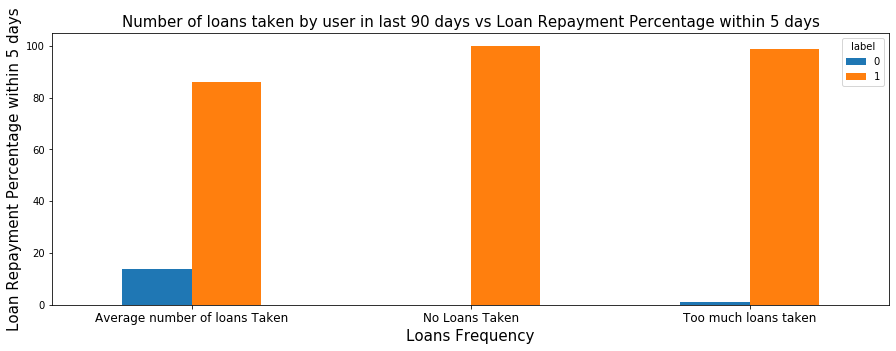

In [50]:
#   Graphical representation of the Loans_Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loans_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loans Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Conclusion:    
**From the above graph it is clear that:**   
1) Users who take more number of loans are non defaulters(i.e 98% of the category) as they repays the loan within the given time i.e 5 days.    
2) 14% of the Users are are among the average number of loan taken category are defaulters.   

##### Feature "sumamnt_ma_rech90":Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days

In [51]:
# Making a new  feature "Recharge_Amount_Category" to store the different categories for the sumamnt_ma_rech90 feature to get a better view of the visualtion..
conditions_3=[(df_visual['sumamnt_ma_rech90'] <=0),df_visual['sumamnt_ma_rech90'].between(0,12),df_visual['sumamnt_ma_rech90'].between(12,15),(df_visual['sumamnt_ma_rech90'] > 14)]
values_3= ['No Recharge', 'Between 0 and 12(Rupiah)', 'Between 12 and 15(Rupiah)','More than 15']
df_visual['Recharge_Amount_Category']=np.select(conditions_3,values_3)

In [52]:
df_visual['Recharge_Amount_Category'].value_counts()

Between 0 and 12(Rupiah)     178205
No Recharge                   18683
Between 12 and 15(Rupiah)       186
Name: Recharge_Amount_Category, dtype: int64

In [53]:
# Mapping Recharge_Amount_Category with precentage value with respect to label 
Recharge_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Recharge_Amount_Category']).apply(lambda x: x/x.sum()*100)
Recharge_Amount_Category_percent = Recharge_Amount_Category_percent.transpose()
Recharge_Amount_Category_percent

label,0,1
Recharge_Amount_Category,,
Between 0 and 12(Rupiah),8.696726,91.303274
Between 12 and 15(Rupiah),0.537634,99.462366
No Recharge,40.304020,59.695980


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

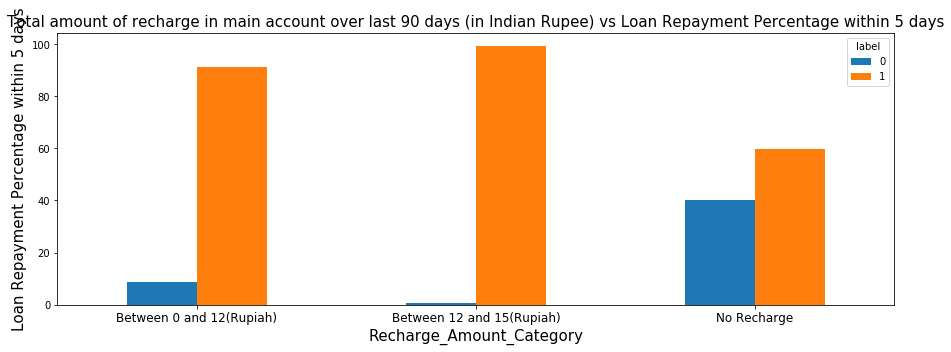

In [54]:
#   Graphical representation of the Recharge_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Recharge_Amount_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge_Amount_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Conclusion:    
**From the above graph it is clear that:**               
1) 40 % of the Users who do not even recharged in the 90 days are defaulters only.                                  
2) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non defaulters.    
3) 34% of the Users  who do less amount of recharge are defaulters.               

##### Feature "payback90":Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days

In [55]:
# Making a new  feature "Defaulters_Category" to store the different categories for the payback90 feature to get a better view of the visualtion..
conditions_4=[(df_visual['payback90'] <=5),(df_visual['payback90'] > 5)]
values_4= ['Not Defaulters','Defaulters']
df_visual['Defaulters_Category']=np.select(conditions_4,values_4)

In [56]:
df_visual['Defaulters_Category'].value_counts()

Not Defaulters    196995
Defaulters            79
Name: Defaulters_Category, dtype: int64

In [57]:
# Mapping Defaulters_Category with precentage value with respect to label 
Defaulters_Category_percent = pd.crosstab(df_visual['label'],df_visual['Defaulters_Category']).apply(lambda x: x/x.sum()*100)
Defaulters_Category_percent = Defaulters_Category_percent.transpose()
Defaulters_Category_percent

label,0,1
Defaulters_Category,,
Defaulters,11.392405,88.607595
Not Defaulters,11.685576,88.314424


(array([0, 1]), <a list of 2 Text xticklabel objects>)

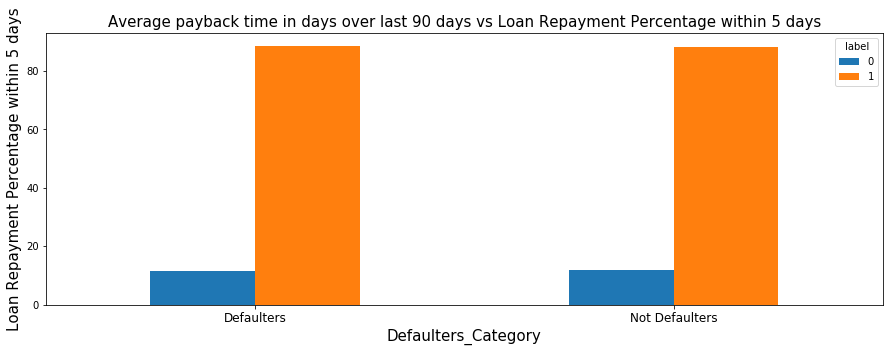

In [58]:
#   Graphical representation of the Defaulters_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.


Defaulters_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Defaulters_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Feature "amnt_loans90": Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days

In [59]:
# Making a new  feature "Loan_Amount_Category" to store the different categories for the amnt_loans90 feature to get a better view of the visualtion..
conditions_5=[(df_visual['amnt_loans90'] <=0),df_visual['amnt_loans90'].between(0,1),df_visual['amnt_loans90'].between(1,3),(df_visual['amnt_loans90'] > 3)]
values_5= ['No loans', 'Low Amount', 'Average Amount','High Amount']
df_visual['Loan_Amount_Category']=np.select(conditions_5,values_5)

In [60]:
# Printing the values...
df_visual['Loan_Amount_Category'].value_counts()

Average Amount    122273
High Amount        72852
No loans            1949
Name: Loan_Amount_Category, dtype: int64

**Users who take small loans are more in number**

In [61]:
# Mapping Loan_Amount_Category with precentage value with respect to label 
Loan_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Loan_Amount_Category']).apply(lambda x: x/x.sum()*100)
Loan_Amount_Category_percent = Loan_Amount_Category_percent.transpose()
Loan_Amount_Category_percent

label,0,1
Loan_Amount_Category,,
Average Amount,17.415128,82.584872
High Amount,2.381541,97.618459
No loans,0.000000,100.000000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

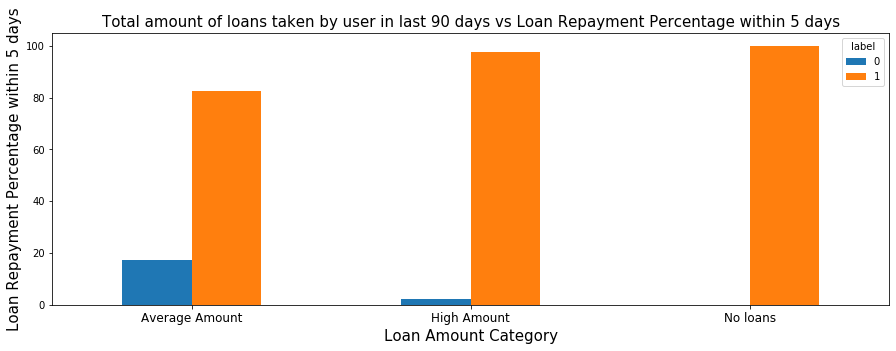

In [62]:
#   Graphical representation of the Loan_Amount_Category along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Loan_Amount_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loan Amount Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


## Conclusion:      
**From the above  graph it is clear that:**               
1) Users who did not take any loans are non defaulters.                  
2) Most of the Users(i.e 97%)  who take large amount of loans comes under non defaulter category.              
3) 17% of the users who take small loans are defaulters.                                           

## Feature "cnt_ma_rech90" :Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days


In [63]:
# Making a new  feature "Recharge Frequency" to store the different categories for the cnt_ma_rech90 feature to get a better view of the visualtion..
conditions_6=[(df_visual['cnt_ma_rech90'] <=0),df_visual['cnt_ma_rech90'].between(0,1),df_visual['cnt_ma_rech90'].between(1,3),(df_visual['cnt_ma_rech90'] > 3)]
values_6= ['Not Recharged', 'Low Recharge Frequency', 'Average Recharge Frequency','High Recharge Frequency']
df_visual['Recharge Frequency']=np.select(conditions_6,values_6)

In [64]:
# Printing values...
df_visual['Recharge Frequency'].value_counts()

Average Recharge Frequency    142698
Low Recharge Frequency         25315
Not Recharged                  18683
High Recharge Frequency        10378
Name: Recharge Frequency, dtype: int64

In [65]:
# Mapping Recharge Frequency with precentage value with respect to label 
Recharge_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Recharge Frequency']).apply(lambda x: x/x.sum()*100)
Recharge_Frequency_percent = Recharge_Frequency_percent.transpose()
Recharge_Frequency_percent

label,0,1
Recharge Frequency,,
Average Recharge Frequency,6.213121,93.786879
High Recharge Frequency,0.645596,99.354404
Low Recharge Frequency,25.937191,74.062809
Not Recharged,40.304020,59.695980


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

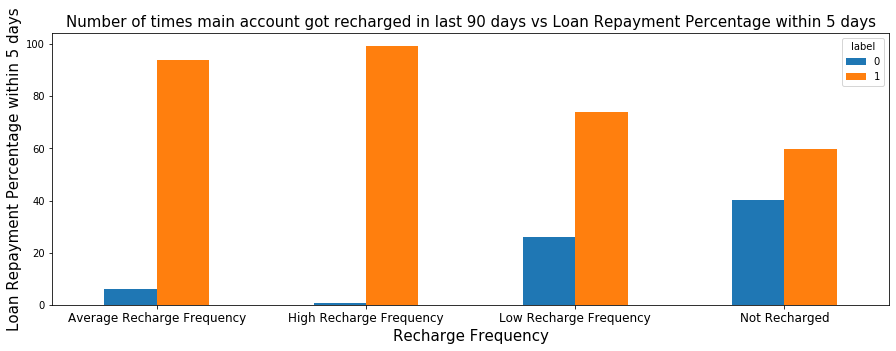

In [66]:
#   Graphical representation of the Recharge Frequency along with their (defaulter or non defaulter) category and 
#                    their ability to repay the loan amount within 5 days.

Recharge_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Conclusion:    
**From the above graph it is clear that:**
1) Among the Users who have not done a single recharge in 3 months 40% are defaulters.    
2) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.   

#####  Feature "aon": age on cellular network in days vs Loan Repayment Percentage within 5 days

In [67]:
# Making a new  feature "Users_Category" to store the different categories for the "aon" feature to get a better view of the visualtion..
conditions_7=[(df_visual['aon'] <2),df_visual['aon'].between(2,5),(df_visual['aon'] > 5)]
values_7= ['New Users','Average Users','Old Users']
df_visual['Users_Category']=np.select(conditions_7,values_7)

In [68]:
# Printing the values...
df_visual['Users_Category'].value_counts()

Old Users        173827
Average Users     23143
New Users           104
Name: Users_Category, dtype: int64

**New Users are very few in number as compared to Old Users which are in a large number**

In [69]:
# Mapping Users_Category with precentage value with respect to label.. 
Users_Category_percent = pd.crosstab(df_visual['label'],df_visual['Users_Category']).apply(lambda x: x/x.sum()*100)
Users_Category_percent = Users_Category_percent.transpose()
Users_Category_percent

label,0,1
Users_Category,,
Average Users,19.418399,80.581601
New Users,32.692308,67.307692
Old Users,10.643341,89.356659


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

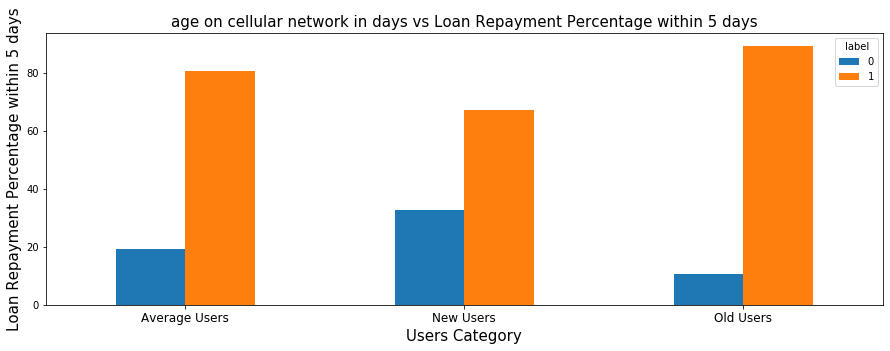

In [70]:
#         Graphical representation of the User's Age on the cellular network along with 
#    their (defaulter or non defaulter) category and their ability to repay the loan amount within 5 days...

Users_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('age on cellular network in days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Users Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


##### Conclusion:       
**From the above graph it is clear that:**   
1) 32% of the uers who are defaulters are the new users.            
2) Old Users are trusted and they are mostly non defaulters.             

In [71]:
df_clean.isnull().sum()

label                   0
aon                     0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
rental90                0
dtype: int64

In [72]:
# Dropping the target value to fit the remaining data into standard scaler 
x2=df_clean.drop(['label'],axis=1)
x2
print(x2.shape)

(197074, 22)


In [73]:
# Setting up the Target value in variable y1.
y1=df_clean['label']
y1.shape

(197074,)

In [74]:
# Importing Library for Handling Imbalance dataset
from imblearn.combine import SMOTETomek

In [75]:
# Treating Imbalance data..
smk = SMOTETomek(random_state=101)
x1,y=smk.fit_sample(x2,y1)
x1.shape, y.shape

((344422, 22), (344422,))

In [ ]:
x2.columns

Index(['aon', 'daily_decr90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech90',
       'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90',
       'rental90'],
      dtype='object')

In [ ]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x2.columns)
x.head()
# Thus we can infer that dataset becomes scaled.

,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,-0.530848,0.770199,-0.362730,-0.153913,0.474289,0.566031,-0.331583,-0.194631,1.612542,0.300115,0.491807,-0.438416,-0.14413,-0.070706,0.139577,-0.151790,-0.058597,-0.009450,-0.201197,-0.225691,2.556724,-0.534525
1,0.595403,1.202449,1.477851,-0.153913,0.925173,0.988685,0.643011,-0.645965,-0.912141,0.479636,0.947296,0.655395,-0.14413,-0.070706,-0.724789,2.262913,-0.769451,-0.009450,2.497016,-0.225691,-0.738553,0.129537
2,0.260643,0.523513,-0.090620,-0.153913,0.474289,0.566031,0.683059,-0.645965,-0.912141,0.103063,0.491807,0.700342,-0.14413,-0.070706,-0.724789,-0.151790,-0.769451,-0.809904,-0.201197,-0.225691,-0.738553,-0.410659
3,-0.672255,-0.778718,2.133479,-0.153913,0.309062,-1.776923,-1.380877,-0.645965,-0.912141,-0.034932,0.324893,-0.926687,-0.14413,-0.070706,0.139577,-0.151790,-0.058597,-0.009450,-0.201197,-0.225691,-0.738553,-0.554016
4,0.929606,-0.175094,0.120445,-0.153913,0.612368,0.695466,0.286761,1.028262,-0.014823,0.878132,0.708242,0.355896,-0.14413,-0.070706,2.230496,-0.151790,1.660975,1.537374,-0.201197,-0.225691,0.427926,-0.372189


# Model Training

In [ ]:
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques...
# from sklearn.ensemble import GradientBoostingClassifierx apviorn
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
lr=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()

In [ ]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** LogisticRegression *****************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Max Accuracy Score corresponding to Random State  73 is: 0.7667997386949263


Learning Score :  0.7624456969481412
Accuracy Score :  0.7667997386949263
Cross Val Score :  0.7632032986661226
roc auc score :  0.7667996193659254


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     34443
           1       0.77      0.76      0.76     34442

    accuracy                           0.77     68885
   macro avg       0.77      0.77      0.77     68885
weighted avg       0.77      0.77      0.77     68885



Confusion Ma

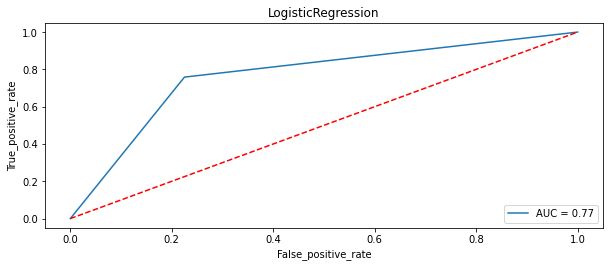

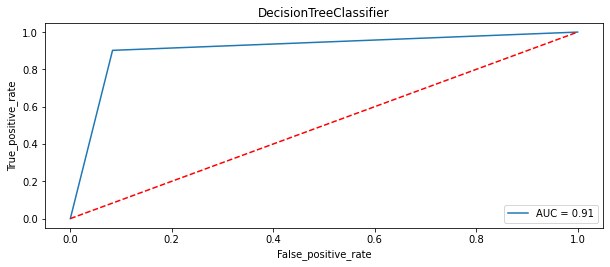

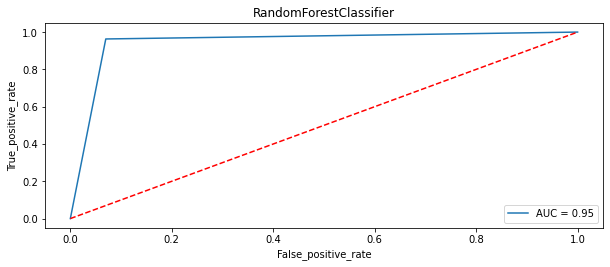

In [ ]:

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
   
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [ ]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,LogisticRegression,76.244570,76.679974,76.320330,76.679962
1,DecisionTreeClassifier,99.977136,90.945779,90.542766,90.945769
2,RandomForestClassifier,99.978587,94.662118,94.264669,94.662142


##### From above we can conclude that Random Forest Classifier is performing well in terms of Accuracy score, Cross val score and Roc_Auc score as compared to other models.

##### Thus Using Gridsearch CV for Hyperparameter tuning. 

### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,n_jobs=-1,refit=True)
    clf.fit(x_train,y_train)
    print(clf.best_params_)

In [ ]:
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500],'max_features': ['auto', 'sqrt', 'log2'],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'roc_auc')

In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
max_acc_score(rf,x,y)

#### After all this process conclusion of Hyper Parameter is that Random Forest Classifier is giving accuracy of 94.73%. So now I am making a final model using Random Forest Classifier.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=.20,stratify=y)
rfc=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
rfcpred=rfc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfcpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfcpred))
print('Classification Report:','\n',classification_report(y_test,rfcpred))

Accuracy Score: 0.9458808158525078
Confusion Matrix: [[31920  2522]
 [ 1206 33237]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     34442
           1       0.93      0.96      0.95     34443

    accuracy                           0.95     68885
   macro avg       0.95      0.95      0.95     68885
weighted avg       0.95      0.95      0.95     68885



(2.5, -0.5)

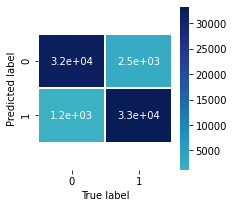

In [ ]:
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, rfcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

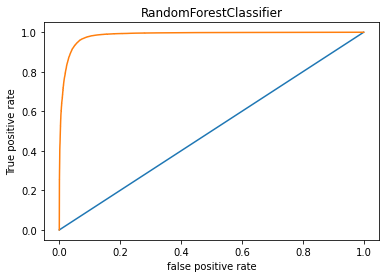

roc_auc_score =  0.9847383253610302


In [ ]:
y_probs = rfc.predict_proba(x_test)
y_probs = y_probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [ ]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=rfcpred
test

,0,Predicted values
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
68880,1,1
68881,0,0
68882,0,0
68883,1,1


### Conclusion:
1) 28 percent are very highly defaulting users with a negative or null balance.

2) 10% to 12% of users are defaulters in the Average and Low Balance categories.

3) Users with high equilibrium and a much lower number are defaulter.

4) Nonstandard loans (i.e. 98 percent of the category) are paid to users who take up more loans as they pay back the loan within 5 days.

5) 14 percent of users fall into the category of defaulting loans, on average.

6) The default is only 40% of users who do not reload in 90 days.

7) Users who recharge very high pay their loans on time. That is, 98% of them are non-defaulting ones.

8) defaulting is 34 percent of users who reload less.

9) Non-defaulting users who have taken no loans.

10) Most users (i.e., 97%) taking large loans fall into non-default categories.   

11) 17% of users receiving small loans are non-performing.

12) Defaulters include 40 percent of the users that do not have a single recharge in 3 months.

13) Of users who recharge and pay their loans on time, 99 percent are more in number, which is good news for the company than for any other category.

14) The new users constitute 32% of the users defaulting.

15) Old and largely non default users are trusted.